In [1]:
import pandas as pf
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

import warnings
warnings.filterwarnings("ignore")

from xaimoo.utilities.data import label_vehicle_crash, label_two_bar_truss, label_welded_beam
from xaimoo.utilities.visualize import plot_rule_explanations
from xaimoo.explanations.rules import train_skope_rules, explain_skope_rules, train_rulefit_rules, explain_rulefit_rules, rule_to_conditions, index_rules, combine_rule_conditions, simplify_rules

def plot_helper(rules, to_consider, df, obj_names, target_category):

    rules_list = [rules[i][0] for i in to_consider]

    cons = combine_rule_conditions(rules_list)
    df["mark"] = df.apply(cons, axis=1)

    plot_rule_explanations(df, obj_names, "mark", "category", target_category, title=f"{simplify_rules(rules_list)}")

## Vehicle crash worthiness
### Skope rules

In [64]:
df_crash, var_names, obj_names = label_vehicle_crash("../data/VehicleCrash.csv")

target_category = 3

skope_kwargs = {"max_depth": range(1, (len(var_names) + 1)*2),
                "precision_min": 0.1,
                "recall_min": 0.1,
                "bootstrap": True,
                "bootstrap_features": True,
                "max_samples": 0.90,
                "n_estimators": (len(var_names)+1)*10,
                "min_samples_split": 0.05,
                "max_depth_duplication": 10
               }

classifier = train_skope_rules(df_crash, var_names, target_category, classifier_kwargs=skope_kwargs)
rules = index_rules(explain_skope_rules(classifier))

Rule --> (Accuracy, Recall, F1-score)
0: x3 <= 1.9649 and x4 > 2.50813 and x5 <= 1.94974 --> ('0.553', '0.713', '0.623')
1: x1 <= 2.26245 and x3 <= 1.76164 and x4 > 2.50813 --> ('0.448', '0.654', '0.532')
2: x2 <= 2.12166 and x3 <= 1.95476 and x4 > 2.50773 --> ('0.436', '0.664', '0.526')
3: x3 <= 1.65481 and x4 > 2.50773 --> ('0.380', '0.715', '0.496')
4: x1 <= 2.39463 and x4 > 2.50775 and x5 <= 1.93385 --> ('0.376', '0.640', '0.474')
5: x2 <= 2.23471 and x4 > 2.50813 and x5 <= 1.93161 --> ('0.386', '0.590', '0.467')
6: x4 > 2.51433 and x5 <= 1.6743 --> ('0.359', '0.618', '0.454')
7: x1 <= 2.22258 and x2 <= 2.26534 and x4 <= 2.84464 and x4 > 2.50775 --> ('0.336', '0.508', '0.405')
8: x1 <= 2.24173 and x2 <= 2.06265 and x4 > 2.52591 --> ('0.317', '0.551', '0.402')
9: x2 <= 1.96825 and x4 > 2.50763 --> ('0.277', '0.677', '0.393')
10: x4 <= 2.79363 and x4 > 2.50784 and x5 <= 1.77078 --> ('0.346', '0.418', '0.379')
11: x1 <= 2.04478 and x4 <= 2.83369 and x4 > 2.50773 --> ('0.264', '0.514',

True positives  = 588 / 839
True negatives  = 18632 / 19161
False positives = 529 / 1117
False negatives = 251 / 18883


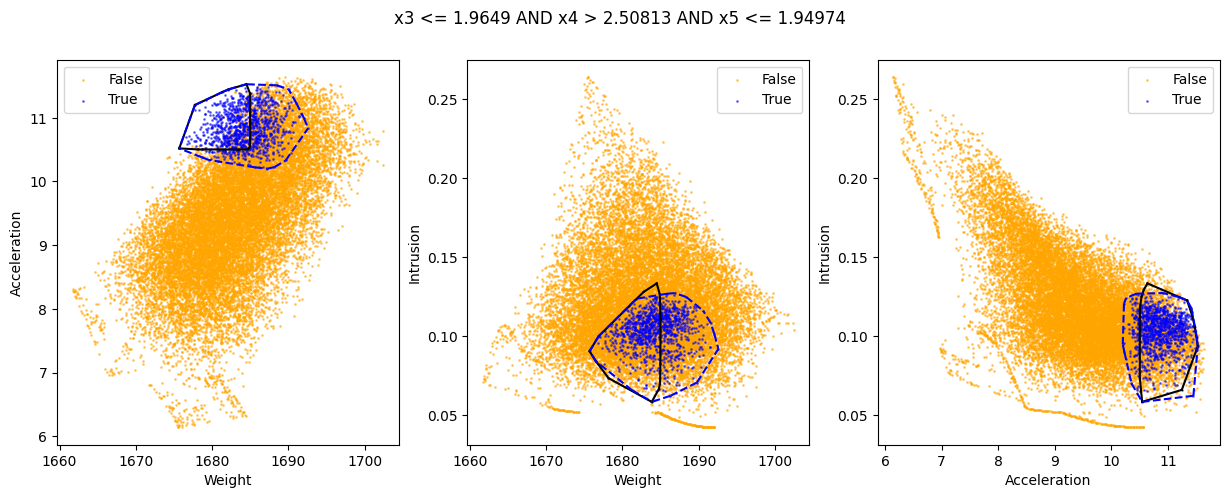

In [69]:
plot_helper(rules, [0], df_crash, obj_names, target_category)

True positives  = 46 / 839
True negatives  = 19161 / 19161
False positives = 0 / 46
False negatives = 793 / 19954


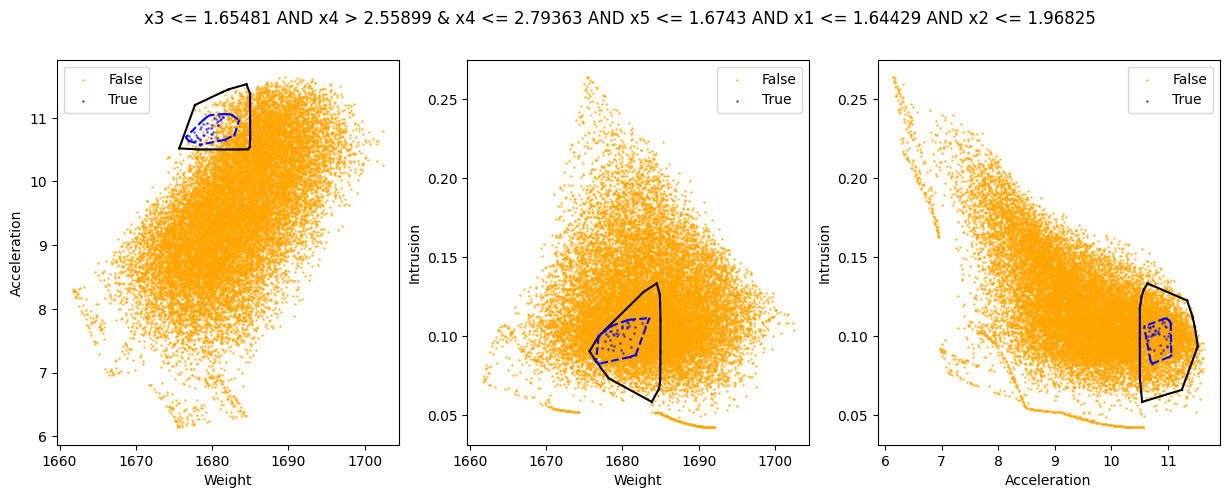

In [70]:
plot_helper(rules, range(15), df_crash, obj_names, target_category)

### Rulefit

In [5]:
rulefit_kwargs = {"tree_size": 8}
classifier = train_rulefit_rules(df_crash, var_names, target_category, classifier_kwargs=rulefit_kwargs)
rules = index_rules(explain_rulefit_rules(classifier))

Rule --> (Support, Importance)
0: x1 > 1.1038 and x4 > 1.29884 --> (0.7945, 0.008735991180468042)
1: x4 > 1.41815 --> (0.78, 0.0030879497253182824)
2: x4 > 1.42571 --> (0.7752, 0.016194135618307348)
3: x4 > 1.43065 --> (0.7725, 0.04060333447913298)
4: x4 > 1.43929 --> (0.76835, 0.024673710630346485)
5: x4 > 1.48389 --> (0.74585, 0.014870027061640282)
6: x4 > 1.4859 --> (0.7443, 0.0690017338758978)
7: x4 > 1.51186 --> (0.7318, 0.06407063719439955)
8: x4 > 1.51315 --> (0.73085, 0.02770026975564261)
9: x4 > 1.53829 --> (0.7198, 0.00010983928558727398)
10: x4 > 1.55466 --> (0.7126, 0.003694626604116356)
11: x1 > 1.28138 and x4 > 1.34285 --> (0.7017, 0.13025265285587873)
12: x4 > 1.57859 --> (0.70145, 0.00022654867355805704)
13: x4 > 1.5797 --> (0.7008, 0.008852144003439104)
14: x4 > 1.58271 --> (0.69925, 0.0002951799523555462)
15: x4 > 1.59615 --> (0.69155, 0.00885331461140238)
16: x4 > 1.59635 --> (0.6915, 0.005412957250005147)
17: x4 > 1.60704 --> (0.68665, 0.006628405676859884)
18: x4 >

True positives  = 106 / 2726
True negatives  = 3735 / 17274
False positives = 13539 / 13645
False negatives = 2620 / 6355


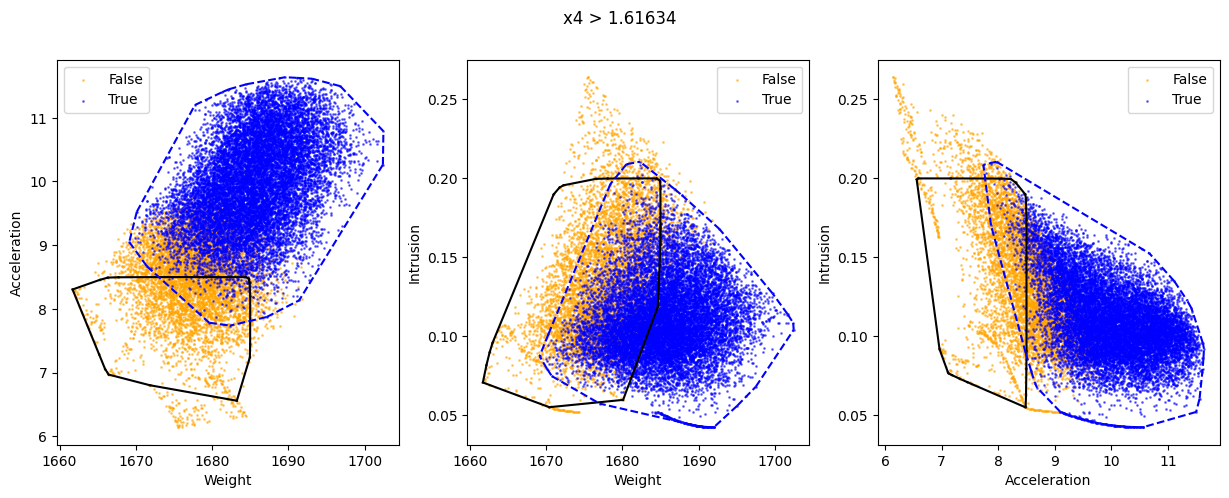

In [6]:
plot_helper(rules, [19, 20], df_crash, obj_names, target_category)

## Two-Bar Truss
### Skope-rules

In [34]:
df_twobar, var_names, obj_names = label_two_bar_truss("../data/TwoBarTruss.csv")

target_category = 3

skope_kwargs = {"max_depth": range(1, (len(var_names) + 1)*2),
                "precision_min": 0.1,
                "recall_min": 0.1,
                "bootstrap": True,
                "bootstrap_features": True,
                "max_samples": 0.90,
                "n_estimators": (len(var_names)+1)*10,
                "min_samples_split": 0.05,
                "max_depth_duplication": 10
               }
classifier = train_skope_rules(df_twobar, var_names, target_category, classifier_kwargs=skope_kwargs)
rules = index_rules(explain_skope_rules(classifier))

Rule --> (Accuracy, Recall, F1-score)
0: x1 > 0.00784 and x2 > 0.00566 --> ('0.634', '0.688', '0.660')
1: x1 > 0.00781 and y > 1.95225 --> ('0.567', '0.665', '0.612')
2: x1 > 0.00785 --> ('0.382', '0.796', '0.517')
3: x1 <= 0.00925 and x1 > 0.00803 and x2 > 0.00491 --> ('0.557', '0.383', '0.454')
4: x1 <= 0.00984 and x1 > 0.00907 --> ('0.499', '0.401', '0.444')
5: x2 > 0.00582 and y > 2.27945 --> ('0.342', '0.573', '0.428')
6: x1 <= 0.00924 and x1 > 0.0078 and y > 2.06683 --> ('0.524', '0.338', '0.411')
7: x1 > 0.00785 and x2 <= 0.00759 and x2 > 0.00477 --> ('0.484', '0.344', '0.402')
8: x1 > 0.00784 and y <= 2.51694 and y > 1.87176 --> ('0.466', '0.327', '0.384')
9: x2 > 0.00607 and y <= 2.73728 and y > 2.21729 --> ('0.324', '0.346', '0.335')
10: x2 <= 0.00948 and x2 > 0.00608 and y > 2.52022 --> ('0.349', '0.319', '0.333')
11: x2 > 0.00759 --> ('0.224', '0.593', '0.326')
12: y > 2.64893 --> ('0.235', '0.430', '0.304')
13: y <= 2.99685 and y > 2.6817 --> ('0.246', '0.390', '0.302')
14

True positives  = 86 / 1715
True negatives  = 15612 / 15613
False positives = 1 / 87
False negatives = 1629 / 17241


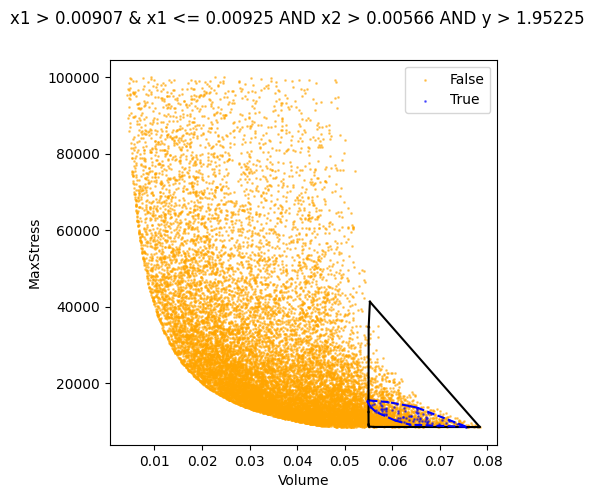

In [45]:
plot_helper(rules, range(5), df_twobar, obj_names, target_category)

True positives  = 0 / 1715
True negatives  = 15613 / 15613
False positives = 0 / 0
False negatives = 1715 / 17328


ValueError: No points given

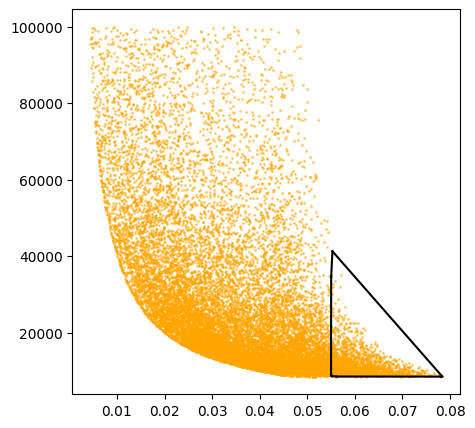

In [33]:
plot_helper(rules, range(15), df_twobar, obj_names, target_category)

### Rulefit

In [13]:
classifier = train_rulefit_rules(df_twobar, var_names, target_category)
rules = index_rules(explain_rulefit_rules(classifier))

Rule --> (Support, Importance)
0: x1 > 0.00191 --> (0.840027700831025, 0.02106986029418555)
1: x1 > 0.00228 --> (0.8011888273314867, 0.03257600748850236)
2: x1 > 0.00261 --> (0.7685826408125577, 0.09806733211832198)
3: x1 > 0.00263 --> (0.7665050784856879, 0.0618488728544562)
4: x1 > 0.00346 --> (0.6748614958448753, 0.13646966184582807)
5: x1 > 0.00353 --> (0.6678208679593721, 0.07169355554839281)
6: x1 > 0.00369 --> (0.6502192982456141, 0.03965628285399021)
7: x1 > 0.00377 --> (0.6420244690674054, 0.8754683741696221)
8: x2 > 0.00441 --> (0.6087257617728532, 0.1639522876302738)
9: x1 <= 0.00227 and x1 > 0.00092 --> (0.1488342566943675, 0.007879888218413358)
10: x1 <= 0.00286 and x2 <= 0.0068 and x2 > 0.00176 --> (0.14768005540166204, 0.2535939733154101)
11: x1 <= 0.00327 and x2 <= 0.00535 and x2 > 0.00178 --> (0.1258079409048938, 0.07171766171041978)
12: x1 <= 0.00317 and x1 > 0.00086 and x2 <= 0.00581 and x2 > 0.0017 --> (0.12171052631578948, 0.16584924515762806)
13: x1 <= 0.00302 and

In [ ]:
rule = rules[10][0]

con = rule_to_conditions(rule)
df_twobar["mark"] = df_twobar.apply(con, axis=1)

plot_rule_explanations(df_twobar, obj_names, "mark", "category", target_category, title=rule)

## Decision tree

f1=0.7733164717040784


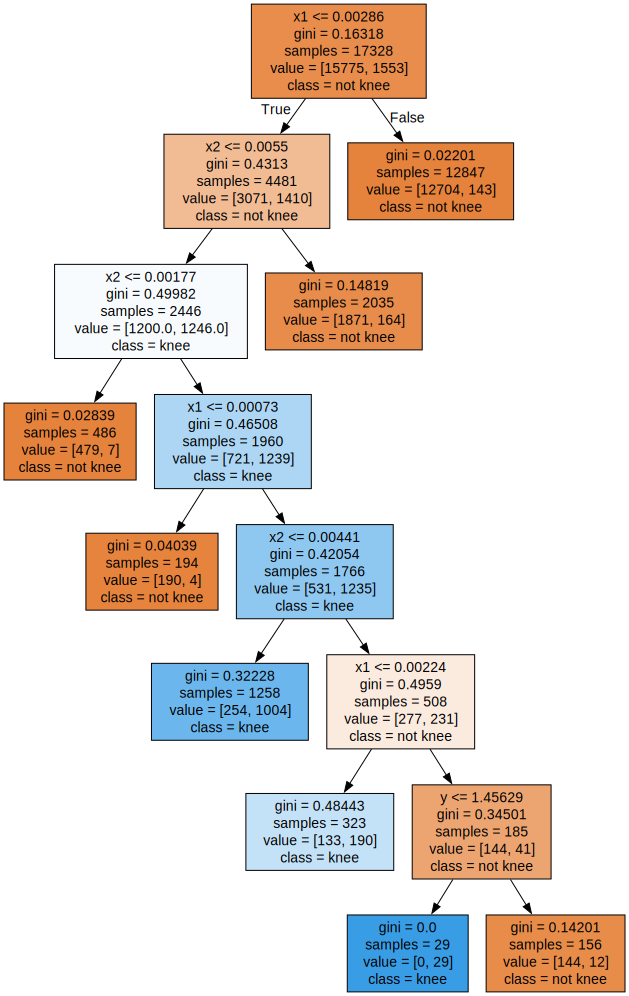

In [51]:
from sklearn import tree
from sklearn.metrics import f1_score
Classifier = tree.DecisionTreeClassifier
import graphviz
import polars as pl

pdf = pl.DataFrame(df_twobar)
pdf = pdf.with_columns(pl.when(pl.col("category") == 1).then(1).otherwise(-1).alias("category"))

xs = pdf[["x1", "x2", "y"]]
ys = pdf[["category"]]
classifier = Classifier(max_leaf_nodes=8)
classifier.fit(xs, ys)

ys_pred = classifier.predict(xs)

f1 = f1_score(ys, ys_pred)
print(f"{f1=}")

dot_data = tree.export_graphviz(classifier, out_file=None, 
                     feature_names=["x1", "x2", "y"],  
                     class_names=["not knee", "knee"],  
                     filled=True, rounded=False, precision=5,  
                     special_characters=False)  
graph = graphviz.Source(dot_data)
graph

## Welded beam
### Skope rules

In [ ]:
df_beam, var_names, obj_names = label_welded_beam("../data/WeldedBeam.csv")

target_category = 3

skope_kwargs = {"max_depth": range(1, len(var_names)+1), "precision_min": 0.5, "recall_min": 0.5}
classifier = train_skope_rules(df_beam, var_names, target_category, classifier_kwargs=skope_kwargs)
rules = index_rules(explain_skope_rules(classifier))

In [ ]:
rule = rules[0][0]

con = rule_to_conditions(rule)
df_beam["skope_mark"] = df_beam.apply(con, axis=1)

plot_rule_explanations(df_beam, obj_names, "skope_mark", "category", target_category, title=rule)

### Rulefit

In [ ]:
classifier = train_rulefit_rules(df_beam, var_names, target_category)
rules = index_rules(explain_rulefit_rules(classifier))

In [ ]:
rule = rules[4][0]

con = rule_to_conditions(rule)
df_beam["mark"] = df_beam.apply(con, axis=1)

plot_rule_explanations(df_beam, obj_names, "mark", "category", target_category, title=rule)